# 📘 1_data_preparation.ipynb
- Projet : Churn Prediction avec MLflow
- Auteur : [SALIM MAJIDE]
---

# Étape 1 : Préparation et exploration du dataset

## 1. Import des librairies

In [1]:
# ========================
# 1. Import des librairies
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Configuration d'affichage

In [2]:
# Configuration d'affichage
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

## 2. Chargement du dataset

In [3]:
import os
print(os.getcwd())


c:\Users\PC\Desktop\sprint5\Churn-Prediction-avec-MLflow\notebooks


In [4]:
# ========================
# 2. Chargement du dataset
# ========================
# ⚠️ Adapter le chemin si nécessaire
import os
os.chdir("C:/Users/PC/Desktop/sprint5/Churn-Prediction-avec-MLflow")
data = pd.read_csv("data/dataset.csv")


In [5]:
print("✅ Dataset chargé avec succès !")
print(f"Nombre d’observations : {data.shape[0]}")
print(f"Nombre de variables : {data.shape[1]}")
display(data.head())

✅ Dataset chargé avec succès !
Nombre d’observations : 10000
Nombre de variables : 14


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Suppression des colonnes inutiles

In [6]:
# ===============================
# 3. Suppression des colonnes inutiles
# ===============================
cols_to_drop = ["RowNumber", "CustomerId", "Surname"]
data = data.drop(columns=cols_to_drop, errors="ignore")

In [7]:
print(f"✅ Colonnes supprimées : {cols_to_drop}")
print(f"Dimensions après nettoyage : {data.shape}")

✅ Colonnes supprimées : ['RowNumber', 'CustomerId', 'Surname']
Dimensions après nettoyage : (10000, 11)


## 4. Nettoyage des valeurs aberrantes

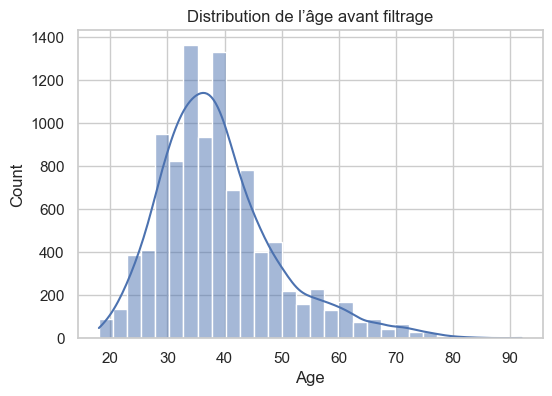

In [8]:
# ===============================
# 4. Nettoyage des valeurs aberrantes
# ===============================
# Vérifions la distribution des âges
plt.figure(figsize=(6,4))
sns.histplot(data["Age"], bins=30, kde=True)
plt.title("Distribution de l’âge avant filtrage")
plt.show()

### Filtrage des âges aberrants

In [9]:
# Filtrage des âges aberrants
data = data[data["Age"] <= 80]
print(f"✅ Valeurs aberrantes supprimées. Taille finale : {data.shape}")

✅ Valeurs aberrantes supprimées. Taille finale : (9988, 11)


## 5. Exploration du churn

📊 Taux de churn global : 20.38%


C:\Users\PC\AppData\Local\Temp\ipykernel_10940\2260265440.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data, palette=['#5DADE2','#E74C3C'])


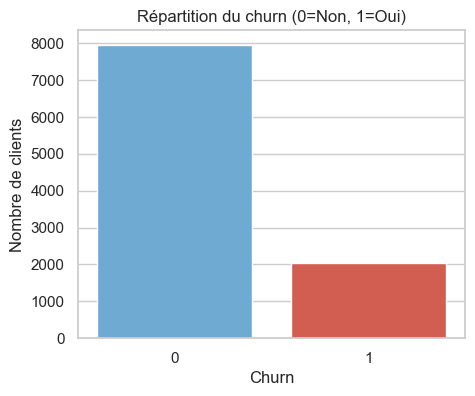

In [10]:
# ===============================
# 5. Exploration du churn
# ===============================
# Vérifions la variable cible
if 'Exited' in data.columns:
    churn_rate = data['Exited'].mean() * 100
    print(f"📊 Taux de churn global : {churn_rate:.2f}%")

    plt.figure(figsize=(5,4))
    sns.countplot(x='Exited', data=data, palette=['#5DADE2','#E74C3C'])
    plt.title("Répartition du churn (0=Non, 1=Oui)")
    plt.xlabel("Churn")
    plt.ylabel("Nombre de clients")
    plt.show()
else:
    print("⚠️ La colonne cible 'Exited' n’a pas été trouvée dans le dataset.")

## 6. Analyse des corrélations

In [11]:
# ===============================
# 6. Analyse des corrélations
# ===============================
# Conversion des variables catégorielles en numériques temporaires
data_num = data.select_dtypes(include=[np.number])
corr_matrix = data_num.corr()

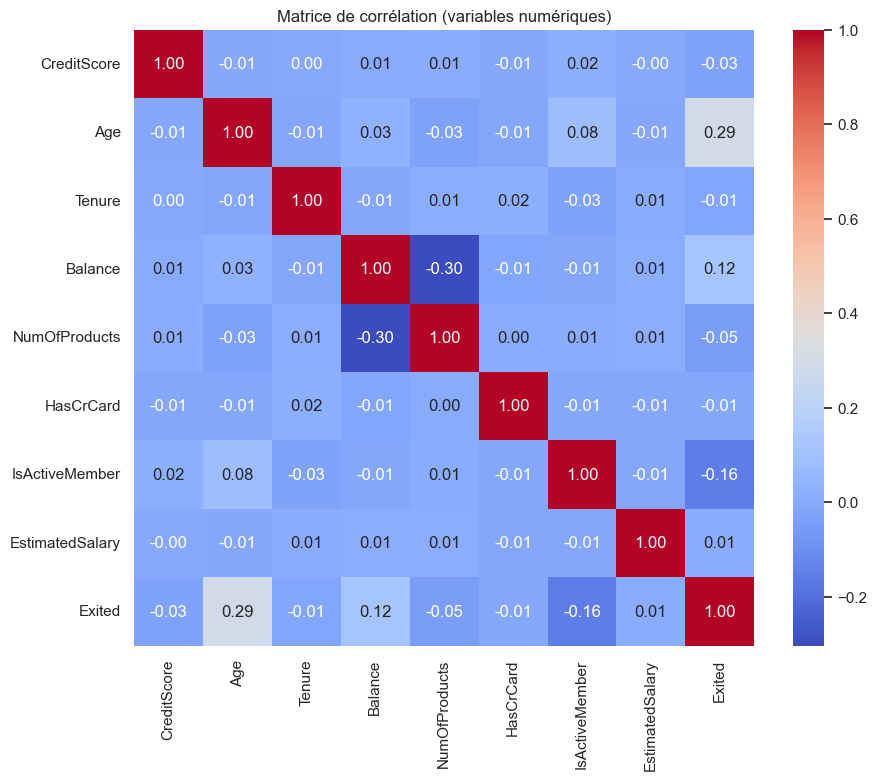

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation (variables numériques)")
plt.show()

## 7. Séparation des features et de la target

In [13]:
# ===============================
# 7. Séparation des features et de la target
# ===============================
X = data.drop(columns=["Exited"])
y = data["Exited"]

In [14]:
print(f"✅ Features shape : {X.shape}")
print(f"✅ Target shape : {y.shape}")

✅ Features shape : (9988, 10)
✅ Target shape : (9988,)


## 8. Split train/test (80/20, stratifié)

In [15]:
# ===============================
# 8. Split train/test (80/20, stratifié)
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [16]:
print("✅ Jeu de données divisé avec succès !")
print(f"Train set : {X_train.shape}, Test set : {X_test.shape}")

✅ Jeu de données divisé avec succès !
Train set : (7990, 10), Test set : (1998, 10)


## 9. Exploration complémentaire

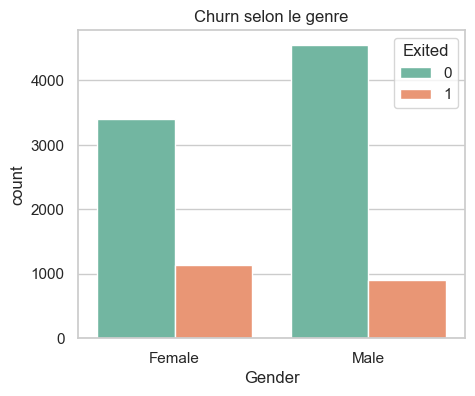

In [17]:
# ===============================
# 9. Exploration complémentaire
# ===============================
# Exemple : relation entre churn et genre
if "Gender" in data.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x='Gender', hue='Exited', data=data, palette='Set2')
    plt.title("Churn selon le genre")
    plt.show()

### Exemple : relation entre churn et pays

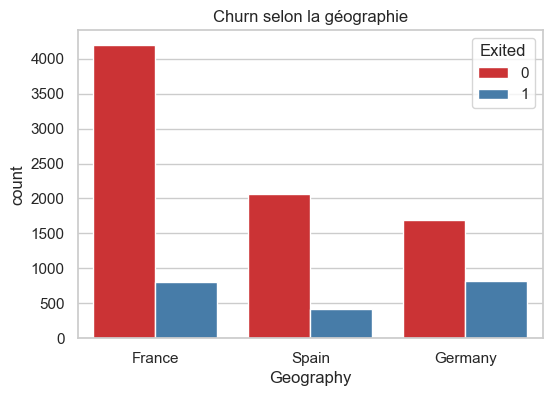

In [18]:
# Exemple : relation entre churn et pays
if "Geography" in data.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Geography', hue='Exited', data=data, palette='Set1')
    plt.title("Churn selon la géographie")
    plt.show()

## 10. Sauvegarde des datasets préparés

In [19]:
# ===============================
# 10. Sauvegarde des datasets préparés
# ===============================
X_train.to_csv("data/X_train.csv", index=False)
X_test.to_csv("data/X_test.csv", index=False)
y_train.to_csv("data/y_train.csv", index=False)
y_test.to_csv("data/y_test.csv", index=False)

In [20]:
print("💾 Datasets sauvegardés dans le dossier data/")
print("✅ Étape 1 (Préparation et Exploration) terminée avec succès !")

💾 Datasets sauvegardés dans le dossier data/
✅ Étape 1 (Préparation et Exploration) terminée avec succès !
